# Logistic Regression in R

In [2]:
install.packages("caret")
install.packages("IDPmisc")
install.packages("magrittr")
install.packages("dplyr")
install.packages("tidyr")
install.packages("lmtest")
install.packages("e1071")
install.packages("popbio")


The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//RtmpRWes0a/downloaded_packages

The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//RtmpRWes0a/downloaded_packages

The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//RtmpRWes0a/downloaded_packages

The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//RtmpRWes0a/downloaded_packages

The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//RtmpRWes0a/downloaded_packages

The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//RtmpRWes0a/downloaded_packages

The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//RtmpRWes0a/downloaded_packages

The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//RtmpRWes0a/downloaded_packages


In [3]:
library("caret")
library("IDPmisc")
library("magrittr")
library("dplyr")
library("tidyr")
library("lmtest")
library("e1071")
library("popbio")

In [4]:
Musical_instruments_reviews = read.csv("../../Data/Musical-instruments-reviews.csv")

In [6]:
head(Musical_instruments_reviews)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,HelpfulYN
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<dbl>
1,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,",5,good,1393545600,"02 28, 2014",0
2,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]","The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]",5,Jake,1363392000,"03 16, 2013",NA
3,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]","The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no noticeable reduction of volume or high frequencies. The double cloth filter blocks the pops and lets the voice through with no coloration. The metal clamp mount attaches to the mike stand secure enough to keep it attached. The goose neck needs a little coaxing to stay where you put it.",5,It Does The Job Well,1377648000,"08 28, 2013",1
4,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and prevents pops. Only thing is that the gooseneck is only marginally able to hold the screen in position and requires careful positioning of the clamp to avoid sagging.,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",0
5,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and performs like a studio filter. If you're recording vocals this will eliminate the pops that gets recorded when you sing.,5,No more pops when I record my vocals.,1392940800,"02 21, 2014",0
6,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]","So good that I bought another one. Love the heavy cord and gold connectors. Bass sounds great. I just learned last night how to coil them up. I guess I should read instructions more carefully. But no harm done, still works great!",5,The Best Cable,1356048000,"12 21, 2012",0


In [5]:
#Recode outcome variable into 0s and 1s
Musical_instruments_reviews$HelpfulYN <- NA
Musical_instruments_reviews$HelpfulYN[Musical_instruments_reviews$helpful == '[0, 0]'] <- 0
Musical_instruments_reviews$HelpfulYN[Musical_instruments_reviews$helpful == '[1, 1]'] <- 1

In [8]:
# Remove missing data
Reviews <- NaRV.omit(Musical_instruments_reviews)

## Testing Assumptions

### Sample size

In [10]:
mylogit <- glm(HelpfulYN~overall, data=Reviews, family="binomial")

In [23]:
probabilities <- predict(mylogit, type="response")
Reviews$Predicted <- ifelse(probabilities > .5, "pos", "neg")

In [24]:
Reviews$PredictedR <- NA
Reviews$PredictedR[Reviews$Predicted == 'pos'] <- 1
Reviews$PredictedR[Reviews$Predicted == 'neg'] <- 0


In [25]:
Reviews$PredictedR <- as.factor(Reviews$PredictedR)
Reviews$HelpfulYN <- as.factor(Reviews$HelpfulYN)

In [26]:
conf_matrix <- caret::confusionMatrix(Reviews$PredictedR, Reviews$HelpfulYN)
conf_matrix

Warning message in confusionMatrix.default(Reviews$PredictedR, Reviews$HelpfulYN):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 6796 1159
         1    0    0
                                         
               Accuracy : 0.8543         
                 95% CI : (0.8464, 0.862)
    No Information Rate : 0.8543         
    P-Value [Acc > NIR] : 0.5078         
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 1.0000         
            Specificity : 0.0000         
         Pos Pred Value : 0.8543         
         Neg Pred Value :    NaN         
             Prevalence : 0.8543         
         Detection Rate : 0.8543         
   Detection Prevalence : 1.0000         
      Balanced Accuracy : 0.5000         
                                         
       'Positive' Class : 0              
                                         

### Logit Linearity

In [27]:
Reviews1 <- Reviews %>% dplyr::select_if(is.numeric)
predictors <- colnames(Reviews1)

In [28]:
Reviews2 <- Reviews1 %>%
  mutate(logit=log(probabilities/(1-probabilities))) %>%
  gather(key= "predictors", value="predictor.value", -logit)

`geom_smooth()` using formula 'y ~ x'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -1.8089”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.089179”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  8.0456e-28”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.0076441”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -1.8089”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 0.089179”
Warning message in predLo

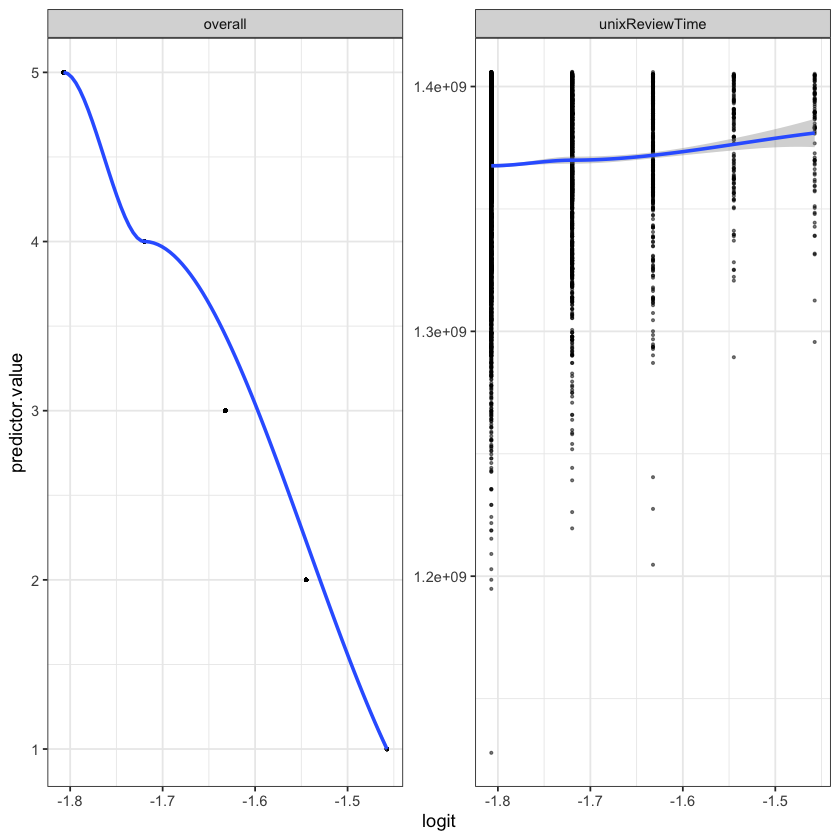

In [29]:
ggplot(Reviews2, aes(logit, predictor.value)) + 
  geom_point(size=.5, alpha=.5) + 
  geom_smooth(method="loess") + 
  theme_bw() + 
  facet_wrap(~predictors, scales="free_y")

### Multicollinearity - only test if you have multiple IVs


### Independent Errors


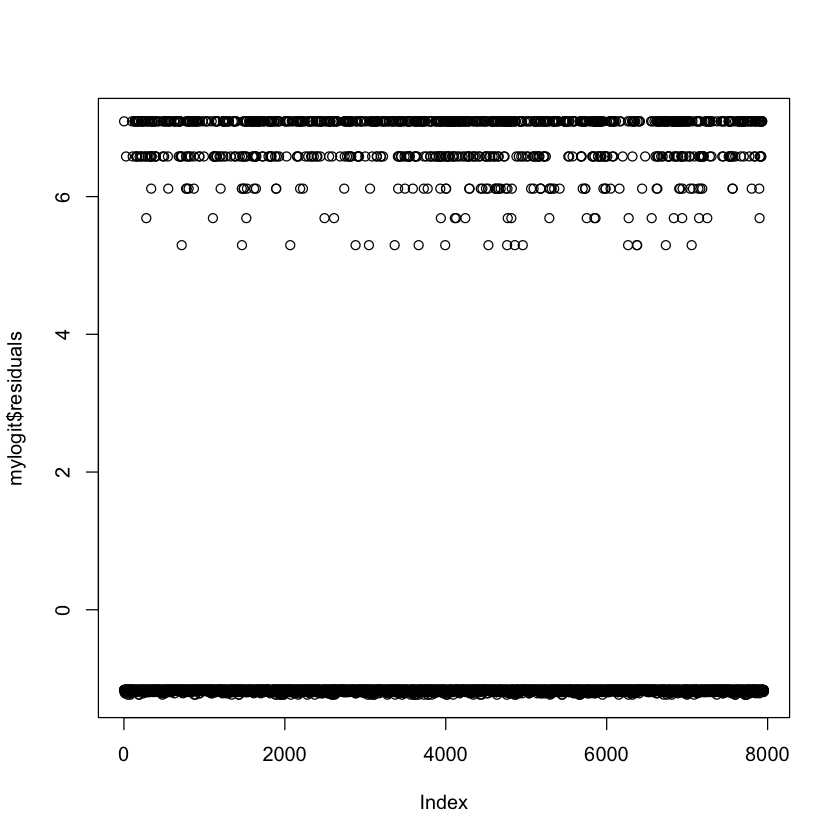

In [30]:
plot(mylogit$residuals)


In [31]:
dwtest(mylogit, alternative = "two.sided")


	Durbin-Watson test

data:  mylogit
DW = 1.7766, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0


In [32]:
### Screen for Outliers
infl <- influence.measures(mylogit)
summary(infl)

Potentially influential observations of
	 glm(formula = HelpfulYN ~ overall, family = "binomial", data = Reviews) :

      dfb.1_ dfb.ovrl dffit   cov.r   cook.d hat    
3     -0.01   0.01     0.03    1.00_*  0.00   0.00  
8     -0.02   0.01    -0.02    1.00_*  0.00   0.00  
13    -0.02   0.01    -0.02    1.00_*  0.00   0.00  
16    -0.03   0.03    -0.03    1.00_*  0.00   0.00_*
53    -0.04   0.04    -0.04    1.00_*  0.00   0.00_*
60    -0.02   0.01    -0.02    1.00_*  0.00   0.00  
72    -0.02   0.01    -0.02    1.00_*  0.00   0.00  
90    -0.04   0.04    -0.04    1.00_*  0.00   0.00_*
94    -0.02   0.01    -0.02    1.00_*  0.00   0.00  
99    -0.03   0.03    -0.03    1.00_*  0.00   0.00_*
115   -0.01   0.01     0.03    1.00_*  0.00   0.00  
150   -0.01   0.01     0.03    1.00_*  0.00   0.00  
156   -0.01   0.01     0.03    1.00_*  0.00   0.00  
157   -0.01   0.01     0.03    1.00_*  0.00   0.00  
159   -0.01   0.01     0.03    1.00_*  0.00   0.00  
160   -0.01   0.01     0.03    1.00

In [33]:
## Examine Output
summary(mylogit)


Call:
glm(formula = HelpfulYN ~ overall, family = "binomial", data = Reviews)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6470  -0.5513  -0.5513  -0.5513   1.9794  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.36997    0.18029  -7.599 2.99e-14 ***
overall     -0.08743    0.03907  -2.238   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6605.3  on 7954  degrees of freedom
Residual deviance: 6600.5  on 7953  degrees of freedom
AIC: 6604.5

Number of Fisher Scoring iterations: 4


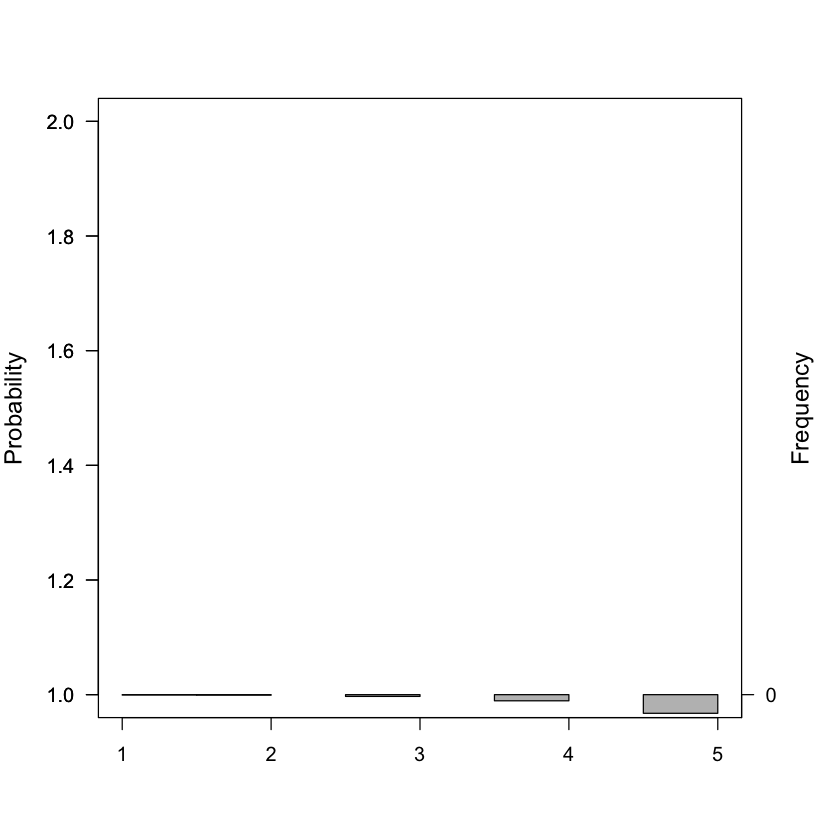

In [22]:
## Graph it
logi.hist.plot(Reviews$overall, Reviews$HelpfulYN, boxp=FALSE, type="hist", col="gray")
